In [8]:
#INSTALO tensorflowJS para exportar el modelo y poder usarlo con tensorflowJS en la WEB
!pip install --no-deps tensorflowjs

  Using cached tensorflowjs-4.1.0-py3-none-any.whl (84 kB)


You should consider upgrading via the 'c:\users\facur\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [89]:
#opencv -> computer vision
#mediapipe -> keypoints from face, body, etc. We focus on the keypoints or landmarks and not on how the image looks like
#matplotlib to visualize imgaes

In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached mediapipe-0.8.11-cp38-cp38-win_amd64.whl (49.0 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


You should consider upgrading via the 'c:\users\facur\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import cv2
import numpy as np
import os
# from matplotlib import pyplot as plt
# import time
import mediapipe

In [10]:
# MEDIA PIPE
mp_holistic = mediapipe.solutions.holistic
mp_drawing = mediapipe.solutions.drawing_utils

In [17]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)                 #prediction from a frame
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [11]:
# para JS -> https://codepen.io/mediapipe/pen/LYRRYEw
# [color1 (B), color2 (G), color3 (R), thickness, circleRadius]
leftHandStyles = [0,138,255,2,1] #naranja
rightHandStyles = [231,217,0,2,1] #celeste
faceStyles = [80,110,10,0,1]
poseStyles = [70,100,5,2,1]
def draw_styled_landmarks(image, results):
    #     FACE
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        mp_drawing.DrawingSpec(color=(faceStyles[0],faceStyles[1],faceStyles[2]), thickness=faceStyles[3], circle_radius=faceStyles[4])
    )
    #     POSE/BODY
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(poseStyles[0],poseStyles[1],poseStyles[2]), thickness=poseStyles[3], circle_radius=poseStyles[4])
    )
    #     LEFT HAND
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(leftHandStyles[0],leftHandStyles[1],leftHandStyles[2]), thickness=leftHandStyles[3], circle_radius=leftHandStyles[4])
    )
    #     RIGHT HAND
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(rightHandStyles[0],rightHandStyles[1],rightHandStyles[2]), thickness=rightHandStyles[3], circle_radius=rightHandStyles[4])
    )

In [91]:
# IMAGE RECORDING

#read image from device 0 with opencv, change it if it doesn't work, try with 1, 2, or see the list of devices on your machine
# caption = cv2.VideoCapture(0)
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
#     while caption.isOpened():
#         ret, frame = caption.read()            #read frame from webcam and unpack them
        
#         image, results = mediapipe_detection(frame, holisticModel)
        
#         #draw_landmarks(image, results)         #modifies the 'image' specified with default styles
#         draw_styled_landmarks(image, results) #modifies the 'image' specified with custom styles
        
#         cv2.imshow('OpenCV', image)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'): #press 'q' to break
#             break
# caption.release()
# cv2.destroyAllWindows()

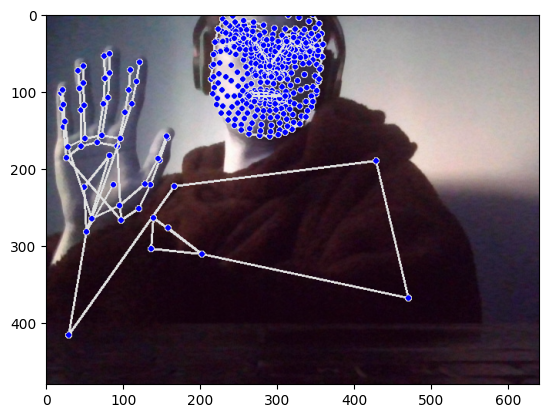

In [21]:
# plt.imshow(frame) -> see last frame from loop
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) -> see last frame from loop with RGB colors
# see landmarks
draw_landmarks(frame, results)
plt.imshow(frame)

In [90]:
# USE NUMPY due to its velocity
# we make array from landmark of the face, pose and hands, each one has a fixed number of landmarks
# if video does not detect any hand it gives 'None', so we have to check if it has values and handle that case and build an array from 0s

# OBTENER ARREGLO CON DATOS (x,y,z) o solo (x,y)

In [22]:
# def array_from_landmarks(results):
#     # LEFT HAND array
#     # len(results.left_hand_landmarks.landmark) = 21 landmarks for each hand, with 3 coordinates each landmark
#     if (results.left_hand_landmarks):
#         leftHandLandmarks = np.array([[result.x, result.y, result.z ] for result in results.left_hand_landmarks.landmark]).flatten()
#     else:
#         leftHandLandmarks = np.zeros(21*3)


#     # RIGHT HAND array
#     # len(results.right_hand_landmarks.landmark) -> same for right hand
#     if (results.right_hand_landmarks):
#         rightHandLandmarks = np.array([[result.x, result.y, result.z ] for result in results.right_hand_landmarks.landmark]).flatten()
#     else:
#         rightHandLandmarks = np.zeros(21*3)


#     # POSE array
#     # len(results.pose_landmarks.landmark) -> 33 landmarks of 4 coordinates each one (X, Y, Z, Visibility)
#     if (results.pose_landmarks):
#         poseLandmarks = np.array([[result.x, result.y, result.z, result.visibility] for result in results.pose_landmarks.landmark]).flatten()
#     else:
#         poseLandmarks = np.zeros(33*4)


#     # FACE array
#     # len(results.face_landmarks.landmark) -> 468 landmarks of 3 coordinates each one
#     if (results.face_landmarks):
#         faceLandmarks = np.array([[result.x, result.y, result.z ] for result in results.face_landmarks.landmark]).flatten()
#     else:
#         faceLandmarks = np.zeros(468*3)
    
#     return np.concatenate((faceLandmarks, poseLandmarks, leftHandLandmarks, rightHandLandmarks))

# ARREGLO con keypoints para almacenar

In [5]:
# THE SAME FROM ABOVE BUT WITHOUT z and visibility
def array_from_landmarks(results):
    # LEFT HAND array
    # len(results.left_hand_landmarks.landmark) = 21 landmarks for each hand, with 2 coordinates each landmark
    if (results.left_hand_landmarks):
        leftHandLandmarks = np.array([[result.x, result.y] for result in results.left_hand_landmarks.landmark]).flatten()
    else:
        leftHandLandmarks = np.zeros(21*2)


    # RIGHT HAND array
    # len(results.right_hand_landmarks.landmark) -> same for right hand
    if (results.right_hand_landmarks):
        rightHandLandmarks = np.array([[result.x, result.y ] for result in results.right_hand_landmarks.landmark]).flatten()
    else:
        rightHandLandmarks = np.zeros(21*2)


    # POSE array
    # len(results.pose_landmarks.landmark) -> 33 landmarks of 2 coordinates each one (X, Y)
    if (results.pose_landmarks):
        poseLandmarks = np.array([[result.x, result.y] for result in results.pose_landmarks.landmark]).flatten()
    else:
        poseLandmarks = np.zeros(33*2)


    # FACE array
    # len(results.face_landmarks.landmark) -> 468 landmarks of 2 coordinates each one
    if (results.face_landmarks):
        faceLandmarks = np.array([[result.x, result.y] for result in results.face_landmarks.landmark]).flatten()
    else:
        faceLandmarks = np.zeros(468*2)
        
    return np.concatenate((faceLandmarks, poseLandmarks, leftHandLandmarks, rightHandLandmarks))

In [87]:
# results.left_hand_landmarks??
# print(results.pose_landmarks)

# print(np.argmax([results.pose_landmarks.landmark[ind].y for ind in range(33)]))
print(results.pose_landmarks)

landmark {
  x: 0.3036697208881378
  y: 0.30556103587150574
  z: -0.3815153241157532
  visibility: 0.9993031024932861
}
landmark {
  x: 0.32410818338394165
  y: 0.25026997923851013
  z: -0.3768726587295532
  visibility: 0.9984360933303833
}
landmark {
  x: 0.33726727962493896
  y: 0.24666361510753632
  z: -0.3772609829902649
  visibility: 0.9986536502838135
}
landmark {
  x: 0.35082951188087463
  y: 0.2432626485824585
  z: -0.3771377205848694
  visibility: 0.9984278678894043
}
landmark {
  x: 0.29074618220329285
  y: 0.26221606135368347
  z: -0.32497841119766235
  visibility: 0.9984853267669678
}
landmark {
  x: 0.2814543545246124
  y: 0.26701951026916504
  z: -0.3245030641555786
  visibility: 0.9986428618431091
}
landmark {
  x: 0.2731519341468811
  y: 0.27247557044029236
  z: -0.32501545548439026
  visibility: 0.9982741475105286
}
landmark {
  x: 0.3955696225166321
  y: 0.2669297754764557
  z: -0.21111097931861877
  visibility: 0.998904824256897
}
landmark {
  x: 0.2881571650505066
 

In [60]:
# SPECIFY FOLDER to store Data from images, the arrays from landmarks
STORE_PATH = os.path.join('LSA_data')

# signs = np.array(['mama','hola'])
signs = np.array(['mama','hola', 'cuernos', 'okay', 'yo'])

numberOfVideos = 25
framesPerVideo = 40

In [10]:
# FOLDER CREATION FOR EACH SIGN TO LEARN
for sign in signs:
    for videoNumber in range(numberOfVideos):
        try:
            # OS_Path/Store_Path_variable/sign_name/videoNumber as string
            os.makedirs(os.path.join(STORE_PATH, sign, str(videoNumber)))
            print(f'''Make dir. {sign} ready: {videoNumber}''')
        except FileExistsError:
            print(f'''Error: {FileExistsError}, {videoNumber}''')

Make dir. mama ready: 0
Make dir. mama ready: 1
Make dir. mama ready: 2
Make dir. mama ready: 3
Make dir. mama ready: 4
Make dir. mama ready: 5
Make dir. mama ready: 6
Make dir. mama ready: 7
Make dir. mama ready: 8
Make dir. mama ready: 9
Make dir. mama ready: 10
Make dir. mama ready: 11
Make dir. mama ready: 12
Make dir. mama ready: 13
Make dir. mama ready: 14
Make dir. mama ready: 15
Make dir. mama ready: 16
Make dir. mama ready: 17
Make dir. mama ready: 18
Make dir. mama ready: 19
Make dir. mama ready: 20
Make dir. mama ready: 21
Make dir. mama ready: 22
Make dir. mama ready: 23
Make dir. mama ready: 24
Make dir. hola ready: 0
Make dir. hola ready: 1
Make dir. hola ready: 2
Make dir. hola ready: 3
Make dir. hola ready: 4
Make dir. hola ready: 5
Make dir. hola ready: 6
Make dir. hola ready: 7
Make dir. hola ready: 8
Make dir. hola ready: 9
Make dir. hola ready: 10
Make dir. hola ready: 11
Make dir. hola ready: 12
Make dir. hola ready: 13
Make dir. hola ready: 14
Make dir. hola ready

In [9]:
# DELETE folders in case you want and CREATE THEm again with the code from above
import shutil
try:
    shutil.rmtree(os.path.join(STORE_PATH))
    print(f'''Directory Removed''')
except:
    print(f'''Error deleting dir.''')

Directory Removed


# TEST CAMERA POSITION

In [12]:
capture = cv2.VideoCapture(0)
while capture.isOpened():
    ret, frame = capture.read()
    cv2.imshow('Probar posicion', frame)
    if (cv2.waitKey(10) & 0xFF == ord('q')):
        break
capture.release()
cv2.destroyAllWindows()

# CAPTURE VIDEOS FOR EACH SIGN

In [13]:
# FOR RECORDING SIGNs AND STORE DATA
caption = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
    for sign in signs:
        for videoNumber in range(numberOfVideos):
            for frameNumber in range(framesPerVideo):
                ret, frame = caption.read()            #read frame from webcam and unpack them
                image, results = mediapipe_detection(frame, holisticModel)

                #draw_landmarks(image, results)       #modifies the 'image' specified with default styles
                draw_styled_landmarks(image, results) #modifies the 'image' specified with custom styles

                if frameNumber == 0:
                    cv2.putText(image, 'Comienza senia: {}'.format(sign), (5,120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (255,255,184), 4)
                    cv2.putText(image, 'Senia: {}. Video Nro: {}'.format(sign, videoNumber+1), (10,20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,184), 2)
                    cv2.imshow('Capturando cuerpo', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Senia: {}. Video Nro: {}'.format(sign, videoNumber+1), (10,20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,184), 2)
                    cv2.imshow('Capturando cuerpo', image)

#                 Store keypoints in it's corresponding folder and file
                keypoints = array_from_landmarks(results)
                localPath = os.path.join(STORE_PATH, sign, str(videoNumber), str(frameNumber))
                np.save(localPath, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'): #press 'q' to break
                    break
caption.release()
cv2.destroyAllWindows()

# CLEAR CAMERA FAILS

In [25]:
# IN CASE CAMERA stops or fails
caption.release()
cv2.destroyAllWindows()

In [20]:
#  I INSTALLED cuDNN, nvidia CUDA, visualStudio2022 to enable GPU
# https://www.youtube.com/watch?v=EmZZsy7Ym-4

# ---------------
# from tensorflow.python.client import device_lib

# def get_available_devices():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos]

# print(get_available_devices())
# ---------------
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('/device:GPU:0')))

# DICCIONARIO DE PALABRAS

In [14]:
# SEPARATE DATA INTO BATCHS OF TRAINING AND TEST DATA
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

sign_labels = {label : index for index, label in enumerate(signs)}
print(sign_labels)

{'mama': 0, 'hola': 1, 'cuernos': 2, 'okay': 3, 'yo': 4}


# ARMADO DEL SET DE DATOS tomando la información guardada de los videos

In [16]:
sequences, labels = [],[]
for sign in signs:
    for video in range(numberOfVideos):
#       framesCollection stores the framesPerFideo of eachVideo (5*1662)
        framesCollection = []
        for frame in range(framesPerVideo):
#           result = array of 1662 components or landmarks
            result = np.load(os.path.join(STORE_PATH, sign, str(video), f'''{str(frame)}.npy'''))
            framesCollection.append(result)
        sequences.append(framesCollection)
        labels.append(sign_labels[sign])
#labels is going to have numberOfVideos * framesPerVideo * 1662
# or numberOfVideos * framesPerVideo * 1086 in case we work just with (x,y) and not with (x,y,z, visibility)
#1662 = 21*3*2 + 33*4 + 468*3 (hands)+(face)+(pose)
#1086 = 21*2*2 + 33*2 + 468*2 (hands)+(face)+(pose)
# labels is an array of numbers one for each sign: 3 signs of 2 videos each
# one [0,0,1,1,2,2]
# sequences is a matrix of signs*numberOfVideos,framesPerVideo,1662

In [56]:
# Pre process data and transform it into data of work

In [37]:
# separate data into set of training data and test data
x = np.array(sequences)
y = to_categorical(labels).astype(int) # transform 0-1-2... into a matrix of 0's and 1's
xTrain, xTest, yTrain, yTest = train_test_split(x, y , test_size=0.05, random_state=1)

Para cada seña que tenemos, he especificado por el momento 2 señas la cual
va a tomar 5 videos para representarla de distintas maneras, cada video está compuesto por 30 frames.
Para cada seña tenemos 5 videos y por cada video 30 'frames'. Cada frame son 1662 puntos o landmarks almacenados.


In [21]:
print("secuences",np.array(sequences).shape)
print(labels)

secuences (125, 40, 1086)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


# ARQUITECTURA, ENTRENAMIENTO DE LA RED

In [52]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [38]:
model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(40, 1662)))
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(40, 1086)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(signs.shape[0], activation='softmax'))

In [53]:
model = Sequential()
model.add(LSTM(2048, return_sequences=False,input_shape=(40,1086),dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(signs.shape[0], activation='softmax'))

In [24]:
model.outputs
model.input

<KerasTensor: shape=(None, 40, 1086) dtype=float32 (created by layer 'lstm_input')>

In [54]:
# we have multiclass classification model so it need loss='categorical_crossentropy'
# configure the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [26]:
boardDirectory = os.path.join('BoardLogs')
tensorboard_callback = TensorBoard(log_dir=boardDirectory)

In [55]:
# train the model
#investigar si se puede reentrenar con nuevas señas o siempre empieza desde 0
model.fit(xTrain, yTrain, epochs=500, callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 2s 275ms/step - loss: 3.2267 - categorical_accuracy: 0.1074
Epoch 2/500
4/4 [==============================] - 1s 208ms/step - loss: 2.3698 - categorical_accuracy: 0.1795
Epoch 3/500
4/4 [==============================] - 1s 207ms/step - loss: 1.7541 - categorical_accuracy: 0.1660
Epoch 4/500
4/4 [==============================] - 1s 210ms/step - loss: 1.6931 - categorical_accuracy: 0.2530
Epoch 5/500
4/4 [==============================] - 1s 210ms/step - loss: 1.7212 - categorical_accuracy: 0.2298
Epoch 6/500
4/4 [==============================] - 1s 208ms/step - loss: 1.7048 - categorical_accuracy: 0.1701
Epoch 7/500
4/4 [==============================] - 1s 208ms/step - loss: 1.6365 - categorical_accuracy: 0.2431
Epoch 8/500
4/4 [==============================] - 1s 209ms/step - loss: 1.6802 - categorical_accuracy: 0.1516
Epoch 9/500
4/4 [==============================] - 1s 208ms/step - loss: 1.6316 - categorical_accuracy: 0.1715
E

4/4 [==============================] - 1s 213ms/step - loss: 1.6103 - categorical_accuracy: 0.2064
Epoch 147/500
4/4 [==============================] - 1s 212ms/step - loss: 1.6133 - categorical_accuracy: 0.2337
Epoch 148/500
4/4 [==============================] - 1s 209ms/step - loss: 1.6100 - categorical_accuracy: 0.2134
Epoch 149/500
4/4 [==============================] - 1s 207ms/step - loss: 1.6040 - categorical_accuracy: 0.2337
Epoch 150/500
4/4 [==============================] - 1s 208ms/step - loss: 1.6096 - categorical_accuracy: 0.2264
Epoch 151/500
4/4 [==============================] - 1s 209ms/step - loss: 1.6057 - categorical_accuracy: 0.2327
Epoch 152/500
4/4 [==============================] - 1s 210ms/step - loss: 1.6077 - categorical_accuracy: 0.2160
Epoch 153/500
4/4 [==============================] - 1s 209ms/step - loss: 1.6066 - categorical_accuracy: 0.2420
Epoch 154/500
4/4 [==============================] - 1s 210ms/step - loss: 1.6105 - categorical_accuracy: 0.19

4/4 [==============================] - 1s 207ms/step - loss: 1.6146 - categorical_accuracy: 0.1868
Epoch 291/500
4/4 [==============================] - 1s 208ms/step - loss: 1.6075 - categorical_accuracy: 0.1993
Epoch 292/500
4/4 [==============================] - 1s 212ms/step - loss: 1.6064 - categorical_accuracy: 0.2535
Epoch 293/500
4/4 [==============================] - 1s 211ms/step - loss: 1.6036 - categorical_accuracy: 0.2181
Epoch 294/500
4/4 [==============================] - 1s 208ms/step - loss: 1.6093 - categorical_accuracy: 0.1381
Epoch 295/500
4/4 [==============================] - 1s 211ms/step - loss: 1.6104 - categorical_accuracy: 0.2212
Epoch 296/500
4/4 [==============================] - 1s 211ms/step - loss: 1.6083 - categorical_accuracy: 0.2222
Epoch 297/500
4/4 [==============================] - 1s 211ms/step - loss: 1.6090 - categorical_accuracy: 0.1889
Epoch 298/500
4/4 [==============================] - 1s 212ms/step - loss: 1.6081 - categorical_accuracy: 0.16

4/4 [==============================] - 1s 208ms/step - loss: 1.6058 - categorical_accuracy: 0.2566
Epoch 435/500
4/4 [==============================] - 1s 214ms/step - loss: 1.6073 - categorical_accuracy: 0.2275
Epoch 436/500
4/4 [==============================] - 1s 206ms/step - loss: 1.6136 - categorical_accuracy: 0.1858
Epoch 437/500
4/4 [==============================] - 1s 209ms/step - loss: 1.6067 - categorical_accuracy: 0.2316
Epoch 438/500
4/4 [==============================] - 1s 205ms/step - loss: 1.6060 - categorical_accuracy: 0.2077
Epoch 439/500
4/4 [==============================] - 1s 211ms/step - loss: 1.6054 - categorical_accuracy: 0.1900
Epoch 440/500
4/4 [==============================] - 1s 206ms/step - loss: 1.6066 - categorical_accuracy: 0.2035
Epoch 441/500
4/4 [==============================] - 1s 212ms/step - loss: 1.6020 - categorical_accuracy: 0.2441
Epoch 442/500
4/4 [==============================] - 1s 212ms/step - loss: 1.6079 - categorical_accuracy: 0.21

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 64)            294656    
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 449,285
Trainable params: 449,285
Non-trainable params: 0
________________________________________________

In [70]:
#Test model with the train batch data
res = model.predict(xTest)
print(res)

[[3.90681362e-06 3.89973211e-05 3.74902826e-04 1.35023583e-06
  2.35616739e-04 4.86541474e-08 9.98923719e-01 7.43203345e-05
  2.07402452e-04 1.39722033e-04]
 [5.21762922e-05 2.35602507e-04 2.28947997e-02 9.66979769e-07
  8.58562344e-05 7.02943510e-07 9.75414872e-01 1.39193857e-04
  5.37667191e-04 6.38244499e-04]
 [9.99286950e-01 3.12230986e-05 1.34444936e-05 2.96822582e-05
  3.70704802e-04 6.56228876e-05 6.01952308e-07 1.51503195e-06
  4.15705908e-05 1.58727213e-04]
 [9.27593428e-05 9.99056637e-01 3.12846154e-04 2.52212285e-05
  5.93793675e-06 2.30895283e-04 6.26960036e-06 9.13380063e-06
  2.35289903e-04 2.49155582e-05]
 [5.84670110e-04 1.61952403e-06 1.87626083e-05 2.84327652e-05
  1.50465542e-06 2.28638055e-05 3.38713326e-05 3.46395973e-05
  4.28384328e-06 9.99269307e-01]
 [7.98990877e-05 6.01044048e-05 4.69254155e-04 1.28613219e-05
  4.63224183e-07 4.22000827e-04 1.52803368e-05 3.84691695e-04
  4.87317607e-07 9.98555005e-01]
 [5.45234388e-06 4.00624303e-05 3.30085400e-04 1.86017223e

In [71]:
signs[np.argmax(res[2])]

'mama'

In [59]:
signs[np.argmax(yTest[2])]

'hola'

In [69]:
# IF model fails in predictions or you just want to start again
del model

In [14]:
# Load model
model.load_weights('modelWeightsTanh.h5')

In [25]:
# Save model if you think its working or if you just want :)
model.save('GRUx3-GPUmia.h5')

# CONFUSION MATRIX, SCORE

In [60]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [61]:
yhat = model.predict(xTrain)

In [62]:
ytrue = np.argmax(yTrain, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [63]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[93,  0],
        [25,  0]],

       [[96,  0],
        [22,  0]],

       [[96,  0],
        [22,  0]],

       [[ 0, 93],
        [ 0, 25]],

       [[94,  0],
        [24,  0]]], dtype=int64)

In [64]:
accuracy_score(ytrue, yhat)

0.211864406779661

In [50]:
# NOW TEST WITH REAL TIME VIDEO
sequence = [] #store 40 frames like the framesPerVideo
sentence = [] #store a list of 'words'
threshold = 0.9

caption = cv2.VideoCapture(0)

with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
    while caption.isOpened():
        ret, frame = caption.read()
        image, results = mediapipe_detection(frame, holisticModel)
        draw_styled_landmarks(image, results)
        
        keypoints = array_from_landmarks(results)
        sequence.append(keypoints)
        # get the last framesPerVideo from the sequence
        sequence = sequence[-framesPerVideo:]
        if len(sequence) == framesPerVideo:
            res = model.predict(np.expand_dims(sequence, axis=0))
#             print(signs[np.argmax(res)])
            res = res[0]
            print("Prediction accuracy: ",res[np.argmax(res)])
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if signs[np.argmax(res)] != sentence[-1]:
                        sentence.append(signs[np.argmax(res)])
                else:
                    sentence.append(signs[np.argmax(res)])
        if len(sentence) > 5:
            sentence = sentence[-5:]
        
        cv2.putText(image, ' '.join(sentence), (10,20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (10,10,184), 2)
        cv2.imshow('Predicting sign..', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'): #press 'q' to break
            break
    caption.release()
    cv2.destroyAllWindows()

Prediction accuracy:  0.37186316
Prediction accuracy:  0.37186247
Prediction accuracy:  0.3718613
Prediction accuracy:  0.37186444
Prediction accuracy:  0.37187067
Prediction accuracy:  0.37188235
Prediction accuracy:  0.3718991
Prediction accuracy:  0.3719261
Prediction accuracy:  0.3718961
Prediction accuracy:  0.37192467
Prediction accuracy:  0.37199935
Prediction accuracy:  0.37199098
Prediction accuracy:  0.37202138
Prediction accuracy:  0.3720446
Prediction accuracy:  0.37206343
Prediction accuracy:  0.37207738
Prediction accuracy:  0.37208775
Prediction accuracy:  0.37209556
Prediction accuracy:  0.37210128
Prediction accuracy:  0.37210456
Prediction accuracy:  0.37210637
Prediction accuracy:  0.3721065
Prediction accuracy:  0.3721058
Prediction accuracy:  0.37210324
Prediction accuracy:  0.37209976
Prediction accuracy:  0.37209418
Prediction accuracy:  0.37208623
Prediction accuracy:  0.37207654
Prediction accuracy:  0.37206513
Prediction accuracy:  0.37205037
Prediction accura

Prediction accuracy:  0.35249612
Prediction accuracy:  0.35539526
Prediction accuracy:  0.35779405
Prediction accuracy:  0.3619638
Prediction accuracy:  0.36478874
Prediction accuracy:  0.36664614
Prediction accuracy:  0.36807013
Prediction accuracy:  0.36930278
Prediction accuracy:  0.3701416
Prediction accuracy:  0.37074804
Prediction accuracy:  0.36940244
Prediction accuracy:  0.36774236
Prediction accuracy:  0.36537352
Prediction accuracy:  0.35181597
Prediction accuracy:  0.32754922
Prediction accuracy:  0.34364578
Prediction accuracy:  0.34557086
Prediction accuracy:  0.34397984
Prediction accuracy:  0.34087473
Prediction accuracy:  0.33665603
Prediction accuracy:  0.33170798
Prediction accuracy:  0.3291226
Prediction accuracy:  0.34008616
Prediction accuracy:  0.35146603
Prediction accuracy:  0.36105245
Prediction accuracy:  0.36336294
Prediction accuracy:  0.3539504
Prediction accuracy:  0.3300004
Prediction accuracy:  0.35618776
Prediction accuracy:  0.314444
Prediction accura

Prediction accuracy:  0.37079507
Prediction accuracy:  0.37070227
Prediction accuracy:  0.3706347
Prediction accuracy:  0.37059036
Prediction accuracy:  0.37055135
Prediction accuracy:  0.37051582
Prediction accuracy:  0.37049785
Prediction accuracy:  0.37047803
Prediction accuracy:  0.37045905
Prediction accuracy:  0.37045372
Prediction accuracy:  0.37044814
Prediction accuracy:  0.37044978
Prediction accuracy:  0.37047866
Prediction accuracy:  0.3704921
Prediction accuracy:  0.37049246
Prediction accuracy:  0.37048882
Prediction accuracy:  0.3705106
Prediction accuracy:  0.37054792
Prediction accuracy:  0.3705911
Prediction accuracy:  0.37062305
Prediction accuracy:  0.3706357
Prediction accuracy:  0.3706484
Prediction accuracy:  0.3706648
Prediction accuracy:  0.37069276
Prediction accuracy:  0.37070984
Prediction accuracy:  0.3707184
Prediction accuracy:  0.37070614
Prediction accuracy:  0.37070236
Prediction accuracy:  0.37069553
Prediction accuracy:  0.37069175
Prediction accurac

Prediction accuracy:  0.62607026
Prediction accuracy:  0.70617276
Prediction accuracy:  0.769806
Prediction accuracy:  0.81211543
Prediction accuracy:  0.83763367
Prediction accuracy:  0.8511561
Prediction accuracy:  0.85649467
Prediction accuracy:  0.8564148
Prediction accuracy:  0.8532394
Prediction accuracy:  0.8470131
Prediction accuracy:  0.8394902
Prediction accuracy:  0.8329768
Prediction accuracy:  0.8275557
Prediction accuracy:  0.82519263
Prediction accuracy:  0.854723
Prediction accuracy:  0.857383
Prediction accuracy:  0.8584933
Prediction accuracy:  0.8597195
Prediction accuracy:  0.8609201
Prediction accuracy:  0.8618886
Prediction accuracy:  0.8619005
Prediction accuracy:  0.86174726
Prediction accuracy:  0.86129576
Prediction accuracy:  0.86077803
Prediction accuracy:  0.8598032
Prediction accuracy:  0.858404
Prediction accuracy:  0.8561426
Prediction accuracy:  0.8535207
Prediction accuracy:  0.84914976
Prediction accuracy:  0.8429068
Prediction accuracy:  0.83175355
P

Prediction accuracy:  0.36941135
Prediction accuracy:  0.3694248
Prediction accuracy:  0.36943537
Prediction accuracy:  0.36947608
Prediction accuracy:  0.36952746
Prediction accuracy:  0.36955395
Prediction accuracy:  0.36954626
Prediction accuracy:  0.3695175
Prediction accuracy:  0.36948875
Prediction accuracy:  0.36943647
Prediction accuracy:  0.3694501
Prediction accuracy:  0.3694957
Prediction accuracy:  0.36954805
Prediction accuracy:  0.36962113
Prediction accuracy:  0.36968023
Prediction accuracy:  0.36969566
Prediction accuracy:  0.36968964
Prediction accuracy:  0.3696871
Prediction accuracy:  0.3697398
Prediction accuracy:  0.36983728
Prediction accuracy:  0.36997157
Prediction accuracy:  0.37008467
Prediction accuracy:  0.37017053
Prediction accuracy:  0.37023404
Prediction accuracy:  0.37025124
Prediction accuracy:  0.37025464
Prediction accuracy:  0.37024778
Prediction accuracy:  0.3702156
Prediction accuracy:  0.3701947
Prediction accuracy:  0.37020734
Prediction accurac

Prediction accuracy:  0.37021676
Prediction accuracy:  0.37031913
Prediction accuracy:  0.3704332
Prediction accuracy:  0.3705504
Prediction accuracy:  0.3706236
Prediction accuracy:  0.3707064
Prediction accuracy:  0.3707757
Prediction accuracy:  0.37083736
Prediction accuracy:  0.3708887
Prediction accuracy:  0.37092838
Prediction accuracy:  0.3709558
Prediction accuracy:  0.37097204
Prediction accuracy:  0.370942
Prediction accuracy:  0.3709358
Prediction accuracy:  0.3709293
Prediction accuracy:  0.37090704
Prediction accuracy:  0.37090522
Prediction accuracy:  0.37090224
Prediction accuracy:  0.37089613
Prediction accuracy:  0.37088615
Prediction accuracy:  0.37114453
Prediction accuracy:  0.3710258
Prediction accuracy:  0.37092286
Prediction accuracy:  0.37083194
Prediction accuracy:  0.37073362
Prediction accuracy:  0.37064466
Prediction accuracy:  0.37058964
Prediction accuracy:  0.37054998
Prediction accuracy:  0.3708555
Prediction accuracy:  0.37107545
Prediction accuracy:  0

Prediction accuracy:  0.8195518
Prediction accuracy:  0.81885225
Prediction accuracy:  0.787607
Prediction accuracy:  0.73378533
Prediction accuracy:  0.6854023
Prediction accuracy:  0.6346899
Prediction accuracy:  0.5948021
Prediction accuracy:  0.56844723
Prediction accuracy:  0.5517258
Prediction accuracy:  0.54136187
Prediction accuracy:  0.53814894
Prediction accuracy:  0.5389988
Prediction accuracy:  0.5385059
Prediction accuracy:  0.5372561
Prediction accuracy:  0.530793
Prediction accuracy:  0.5211111
Prediction accuracy:  0.49357626
Prediction accuracy:  0.5164756
Prediction accuracy:  0.67446756
Prediction accuracy:  0.81142765
Prediction accuracy:  0.8596195
Prediction accuracy:  0.87703884
Prediction accuracy:  0.88540065
Prediction accuracy:  0.8901765
Prediction accuracy:  0.89312994
Prediction accuracy:  0.881547
Prediction accuracy:  0.8705833
Prediction accuracy:  0.8826248
Prediction accuracy:  0.8893422
Prediction accuracy:  0.8944909
Prediction accuracy:  0.89895594

Prediction accuracy:  0.36853614
Prediction accuracy:  0.36838663
Prediction accuracy:  0.3680332
Prediction accuracy:  0.36752617
Prediction accuracy:  0.36679903
Prediction accuracy:  0.36599997
Prediction accuracy:  0.36496758
Prediction accuracy:  0.36354414
Prediction accuracy:  0.36198297
Prediction accuracy:  0.36070007
Prediction accuracy:  0.35941547
Prediction accuracy:  0.35794106
Prediction accuracy:  0.35654226
Prediction accuracy:  0.35514873
Prediction accuracy:  0.3536935
Prediction accuracy:  0.3526964
Prediction accuracy:  0.3519206
Prediction accuracy:  0.3512403
Prediction accuracy:  0.3506316
Prediction accuracy:  0.35037804
Prediction accuracy:  0.35021847
Prediction accuracy:  0.35018364
Prediction accuracy:  0.350398
Prediction accuracy:  0.35037726
Prediction accuracy:  0.35037467
Prediction accuracy:  0.3505319
Prediction accuracy:  0.3506265
Prediction accuracy:  0.35071766
Prediction accuracy:  0.3512084
Prediction accuracy:  0.35162273
Prediction accuracy: 

Prediction accuracy:  0.857127
Prediction accuracy:  0.8539812
Prediction accuracy:  0.8509599
Prediction accuracy:  0.847144
Prediction accuracy:  0.84217644
Prediction accuracy:  0.83610386
Prediction accuracy:  0.8277243
Prediction accuracy:  0.81821334
Prediction accuracy:  0.8067904
Prediction accuracy:  0.79311866
Prediction accuracy:  0.77612376
Prediction accuracy:  0.75893766
Prediction accuracy:  0.7435715
Prediction accuracy:  0.72484636
Prediction accuracy:  0.70742005
Prediction accuracy:  0.691468
Prediction accuracy:  0.676435
Prediction accuracy:  0.6622188
Prediction accuracy:  0.6480439
Prediction accuracy:  0.6337888
Prediction accuracy:  0.62063473
Prediction accuracy:  0.60973257
Prediction accuracy:  0.59691274
Prediction accuracy:  0.5759579
Prediction accuracy:  0.47026342
Prediction accuracy:  0.7869927
Prediction accuracy:  0.8589504
Prediction accuracy:  0.87161225
Prediction accuracy:  0.8765862
Prediction accuracy:  0.878998
Prediction accuracy:  0.8802673


In [38]:
cv2.imshow??

In [37]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(480, 640, 3)

In [15]:
import cv2
from matplotlib import pyplot as plt

In [18]:
caption = cv2.VideoCapture(0)
while caption.isOpened():
    ret, frame = caption.read()
    cv2.imshow('Predicting sign..', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'): #press 'q' to break
        break
caption.release()
cv2.destroyAllWindows()

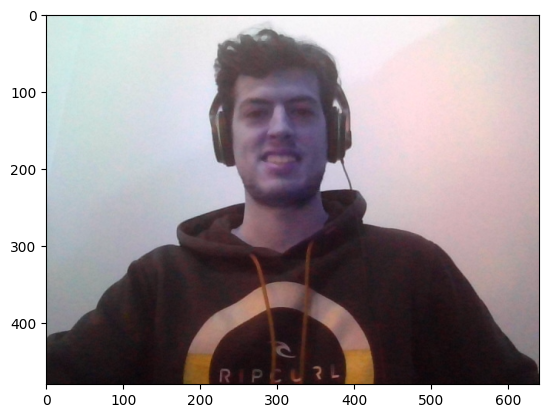

In [19]:
plt.imshow(frame)

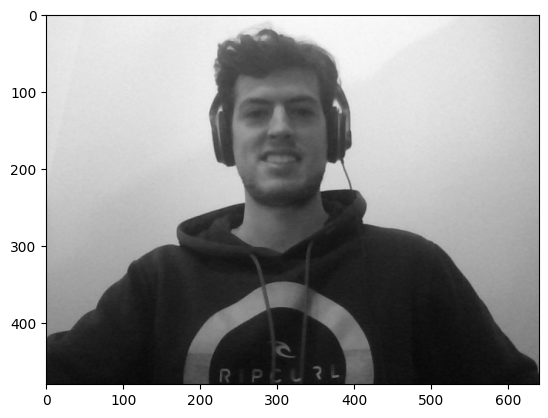

In [22]:
image = frame
gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gris, cmap='gray', vmin = 0, vmax = 255)

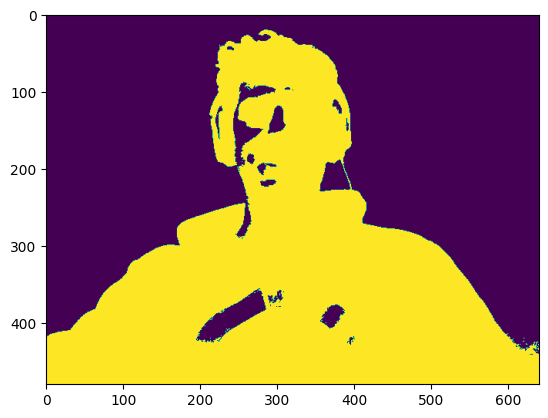

In [23]:
ret,thresh = cv2.threshold(gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)

# FRAMES PER SECOND

In [92]:
# ESTIMATED FRAMES PER SECOND with openCV and time calculation
import time

# for signNumber in range(10):
#     for signNumber2 in range(5):
#         video = cv2.VideoCapture(f'''LSA64/all_cut/041_0{str(signNumber+1).zfill(2)}_00{signNumber2+1}.mp4'''); #video del set de datos
#         print(f'''LSA64/all/010_0{str(signNumber+1).zfill(2)}_00{signNumber2+1}.mp4''')
video = cv2.VideoCapture('LSA64/all_cut/020_005_001.mp4'); #video del set de datos
# video = cv2.VideoCapture('C:/Users/facur/Pictures/Camera Roll/señas1.mp4'); #video capturado con la camara de notebook
# video = cv2.VideoCapture('output1.avi'); #video capturado con el bloque de codigo siguiente
# video = cv2.VideoCapture('señaVideoCelular.mp4'); #video capturado con el celular camara frontal acostado ajuste30fps
# Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
# With webcam get(CV_CAP_PROP_FPS) does not work.
# Let's see for ourselves.
fps = video.get(cv2.CAP_PROP_FPS)
allFrames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print("FPS para video: {0}".format(fps))
print("Cantidad total de Frames: {0}".format(allFrames))
# Release video
video.release()


FPS para video: 59.94
Cantidad total de Frames: 69


# CAPTURE, SAVE and READ VIDEOS

In [24]:
# CAPTURE VIDEO and save it
  
# This will return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)  
  
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('paraDistanciasPuntos.avi', fourcc, 60, (640, 480))

# Guardarlo en 1920x1080 no es posible reproducirlo luego
# out = cv2.VideoWriter('output301920.avi', fourcc, 30, (1920, 1080))
  
# loop runs if capturing has been initialized. 
for i in range(100):
    # reads frames from a camera 
    # ret checks return at each frame
    ret, frame = cap.read() 
    # Converts to RGB color space, OpenCV reads colors as BGR
    # frame is converted to rgb
#     rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # output the frame
    out.write(frame)
    # The window showing the operated video stream 
    cv2.imshow('frame', frame)
    # Wait for 'q' key to stop the program 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
cap.release()
  
# After we release our webcam, we also release the output
out.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()

In [12]:
caption = cv2.VideoCapture('LSA64/all/001_001_001.mp4')
threshold = 0.8
sequence = [] #store 40 frames like the framesPerVideo
sentence = [] #store a list of 'words'

if (caption.isOpened()== False):
    print("Error opening video stream or file")
# Read until video is completed
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
    while(caption.isOpened()):
        # Capture frame-by-frame
        ret, frame = caption.read()
        # Display the resulting frame
        if (ret):
            image, results = mediapipe_detection(frame, holisticModel)
            draw_styled_landmarks(image, results)
            cv2.imshow('Frame',image)   
            keypoints = array_from_landmarks(results)
            
#             sequence.append(keypoints)
#             # get the last framesPerVideo from the sequence
#             sequence = sequence[-framesPerVideo:]
#             if len(sequence) == framesPerVideo:
#                 res = model.predict(np.expand_dims(sequence, axis=0))
#                 #print(signs[np.argmax(res)])
#                 res = res[0]
#                 print("Prediction accuracy: ",res[np.argmax(res)])
#                 if res[np.argmax(res)] > threshold:
#                     if len(sentence) > 0:
#                         if signs[np.argmax(res)] != sentence[-1]:
#                             sentence.append(signs[np.argmax(res)])
#                     else:
#                         sentence.append(signs[np.argmax(res)])
#             if len(sentence) > 5:
#                 sentence = sentence[-5:]
#             cv2.putText(image, ' '.join(sentence), (10,20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (10,10,184), 2)
        else:
            break
        # Press Q on keyboard to  exi
        if cv2.waitKey(25) & 0xFF == ord('q'):
            # Break the loop
            break
    
# When everything done, release the video capture object
caption.release()
# Closes all the frames
cv2.destroyAllWindows()


In [44]:
sentence

['cuernos', 'hola']

In [81]:
np.argmax(res)

2

# DATA SET LSA64
Cantidad maxima y minima de frames para cada seña (64 señas realizadas por 10 personas con 5 videos por cada seña)
   Lista de señas: pagina 71 Tesis Doctoral Franco Ronchetti

In [45]:
max_frames = np.zeros(64)
min_frames = [400 for i in range(64)]
for i in range(64):
    for j in range(10):
        for k in range(5):
            cap = cv2.VideoCapture(f'''LSA64/all_cut/0{str(i+1).zfill(2)}_0{str(j+1).zfill(2)}_00{k+1}.mp4''')
            length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if length > max_frames[i]:
                max_frames[i] = length
            if length < min_frames[i]:
                min_frames[i] = length
print(max_frames)
print(min_frames)

[129. 123. 102. 101. 130. 200.  89.  85. 110. 107.  83. 141. 140. 100.
 134. 108.  75. 114.  79.  98. 117. 111. 139. 105. 144. 164.  97. 144.
 143. 190. 165. 126. 144. 188. 144. 143. 144. 108. 143. 173. 201. 167.
 114. 143. 157. 169. 111. 172. 174. 144. 143. 142. 141. 173. 113. 110.
 144. 142. 115. 142. 171. 143. 142. 137.]
[31, 54, 49, 39, 46, 75, 31, 25, 42, 37, 26, 38, 34, 16, 14, 32, 33, 49, 29, 34, 54, 45, 49, 39, 62, 44, 41, 45, 42, 69, 75, 66, 49, 104, 50, 57, 42, 41, 37, 62, 63, 66, 51, 56, 59, 55, 58, 77, 68, 41, 51, 38, 34, 48, 29, 45, 54, 60, 29, 49, 51, 47, 44, 36]


In [48]:
i = np.argmax(max_frames)
j = np.argmin(min_frames)
print(f'''Maximo numero de frames {max_frames[i]}. Seña: {i}''')
print(f'''Minimo numero de frames {min_frames[j]}. Seña: {j}''')

Maximo numero de frames 201.0. Seña: 40
Minimo numero de frames 14. Seña: 14


# Arma arreglos con los keypoints para las primeras 10 señas
Tomo las primeros 10 señas (10 señas 10 personas 5 videso cada una )

In [55]:
STORE_PATH2 = os.path.join('LSA64_data')
# 'cajón','nacer','aprender'
signs_list = ['opaco', 'rojo', 'verde', 'amarillo', 'brillante', 'celeste', 'colores', 'rosa', 'mujer', 'enemigo', 'hijo', 'hombre', 'lejos','cajón','aprender','llamar','espumadera','amargo','dulce','leche','agua','comida','Argentina','Uruguay','pais','donde','apellido','burla','cumpleanos','desayuno','foto','hambre','mapa','moneda','musica','nave espacial','ninguno','nombre','paciencia','perfume','sordo','trampa','arroz','asado','caramelo','chicle','fideos','yogurt','aceptar','agradecer','apagar','aparecer','aterrizar','atrapar','ayudar','bailar','bañarse','comprar','copiar','correr','darse cuenta','dar','encontrar']
numberOfPersons = 10
numberOfVideosPerPerson = 5
# defino la cantidad maxima de frames para la secuencia y poder realizar el padding a las 
# secuencias con cantidad de frames variables
maximumNumberOfFrames = 201

In [23]:
# FOLDER CREATION FOR EACH SIGN TO LEARN
for sign in signs_list:
    try:
        os.makedirs(os.path.join(STORE_PATH2, sign))
                # OS_Path/Store_Path_variable/sign_name/videoNumber as string
#                 os.makedirs(os.path.join(STORE_PATH2, sign, f'''0{str(videoNumber)}_0{str(videoNumber2)}'''))
        print(f'''Make dir. {sign} ready''')
    except FileExistsError:
        print(f'''Error: {FileExistsError}, {sign}''')
#     for videoNumber in range(numberOfPersons):
#         for videoNumber2 in range(numberOfVideosPerPerson):

Error: <class 'FileExistsError'>, opaco
Error: <class 'FileExistsError'>, rojo
Error: <class 'FileExistsError'>, verde
Error: <class 'FileExistsError'>, amarillo
Error: <class 'FileExistsError'>, brillante
Error: <class 'FileExistsError'>, celeste
Error: <class 'FileExistsError'>, colores
Error: <class 'FileExistsError'>, rosa
Error: <class 'FileExistsError'>, mujer
Error: <class 'FileExistsError'>, enemigo


In [59]:
# defino el valor de paddin como 3 ya que los valores del arreglo estan normalizados entre [0.0, 1.0]
paddingValue = 3
def paddData(sequence):
    paddLength = maximumNumberOfFrames - len(sequence)
    return np.pad(sequence, [(0,paddLength),(0,0)], mode='constant', constant_values=paddingValue)

In [11]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
    for personNumber in range(numberOfPersons):
        for videoNumber in range(numberOfVideosPerPerson):
            caption = cv2.VideoCapture(f'''LSA64/all_cut/030_0{str(personNumber+1).zfill(2)}_00{videoNumber+1}.mp4''')
            print(f'''LSA64/all_cut/030_0{str(personNumber+1).zfill(2)}_00{videoNumber+1}.mp4''')
            if (caption.isOpened() == False):
                print("Error opening video stream or file")
                break
            keypointsSequence = []
            while(caption.isOpened()):
                ret, frame = caption.read()
                if (ret):
                    image, results = mediapipe_detection(frame, holisticModel)
#                         draw_styled_landmarks(image, results)
#                         cv2.imshow('Frame',image) 
                    keypoints = array_from_landmarks(results)
                    keypointsSequence.append(keypoints)
                else:
                    break
                if cv2.waitKey(25) & 0xFF == ord('q'):
                    # Break the loop
                    break
            a = keypointsSequence
            if len(keypointsSequence) < maximumNumberOfFrames:
                a = paddData(keypointsSequence)
            localPath = os.path.join(STORE_PATH2, 'cumpleanos2', f'''0{str(personNumber)}_0{str(videoNumber)}''')
            np.save(localPath, a)
# When everything done, release the video capture object
caption.release()
# Closes all the frames
cv2.destroyAllWindows()
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
#     for sign in range(len(signs_list)):
#         for personNumber in range(numberOfPersons):
#             for videoNumber in range(numberOfVideosPerPerson):
#                 caption = cv2.VideoCapture(f'''LSA64/all_cut/0{str(sign+1).zfill(2)}_0{str(personNumber+1).zfill(2)}_00{videoNumber+1}.mp4''')
#                 print(f'''LSA64/all_cut/0{str(sign+1).zfill(2)}_0{str(personNumber+1).zfill(2)}_00{videoNumber+1}.mp4''')
#                 if (caption.isOpened() == False):
#                     print("Error opening video stream or file")
#                     break
#                 keypointsSequence = []
#                 while(caption.isOpened()):
#                     ret, frame = caption.read()
#                     if (ret):
#                         image, results = mediapipe_detection(frame, holisticModel)
# #                         draw_styled_landmarks(image, results)
# #                         cv2.imshow('Frame',image) 
#                         keypoints = array_from_landmarks(results)
#                         keypointsSequence.append(keypoints)
#                     else:
#                         break
#                     if cv2.waitKey(25) & 0xFF == ord('q'):
#                         # Break the loop
#                         break
#                 a = keypointsSequence
#                 if len(keypointsSequence) < maximumNumberOfFrames:
#                     a = paddData(keypointsSequence)
#                 localPath = os.path.join(STORE_PATH2, signs_list[sign], f'''0{str(personNumber)}_0{str(videoNumber)}''')
#                 np.save(localPath, a)
# # When everything done, release the video capture object
# caption.release()
# # Closes all the frames
# cv2.destroyAllWindows()

LSA64/all_cut/030_001_001.mp4
LSA64/all_cut/030_001_002.mp4
LSA64/all_cut/030_001_003.mp4
LSA64/all_cut/030_001_004.mp4
LSA64/all_cut/030_001_005.mp4
LSA64/all_cut/030_002_001.mp4
LSA64/all_cut/030_002_002.mp4
LSA64/all_cut/030_002_003.mp4
LSA64/all_cut/030_002_004.mp4
LSA64/all_cut/030_002_005.mp4
LSA64/all_cut/030_003_001.mp4
LSA64/all_cut/030_003_002.mp4
LSA64/all_cut/030_003_003.mp4
LSA64/all_cut/030_003_004.mp4
LSA64/all_cut/030_003_005.mp4
LSA64/all_cut/030_004_001.mp4
LSA64/all_cut/030_004_002.mp4
LSA64/all_cut/030_004_003.mp4
LSA64/all_cut/030_004_004.mp4
LSA64/all_cut/030_004_005.mp4
LSA64/all_cut/030_005_001.mp4
LSA64/all_cut/030_005_002.mp4
LSA64/all_cut/030_005_003.mp4
LSA64/all_cut/030_005_004.mp4
LSA64/all_cut/030_005_005.mp4
LSA64/all_cut/030_006_001.mp4
LSA64/all_cut/030_006_002.mp4
LSA64/all_cut/030_006_003.mp4
LSA64/all_cut/030_006_004.mp4
LSA64/all_cut/030_006_005.mp4
LSA64/all_cut/030_007_001.mp4
LSA64/all_cut/030_007_002.mp4
LSA64/all_cut/030_007_003.mp4
LSA64/all_

# Modelo con padding y masking para los datos con padding de LSA64

***Separar datos en entrenamiento y test

In [62]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

sign_labels = {label : index for index, label in enumerate(signs_list)}
print(sign_labels)

{'opaco': 0, 'rojo': 1, 'verde': 2, 'amarillo': 3, 'brillante': 4, 'celeste': 5, 'colores': 6, 'rosa': 7, 'mujer': 8, 'enemigo': 9, 'hijo': 10, 'hombre': 11, 'lejos': 12, 'cajón': 13, 'aprender': 14, 'llamar': 15, 'espumadera': 16, 'amargo': 17, 'dulce': 18, 'leche': 19, 'agua': 20, 'comida': 21, 'Argentina': 22, 'Uruguay': 23, 'pais': 24, 'donde': 25, 'apellido': 26, 'burla': 27, 'cumpleanos': 28, 'desayuno': 29, 'foto': 30, 'hambre': 31, 'mapa': 32, 'moneda': 33, 'musica': 34, 'nave espacial': 35, 'ninguno': 36, 'nombre': 37, 'paciencia': 38, 'perfume': 39, 'sordo': 40, 'trampa': 41, 'arroz': 42, 'asado': 43, 'caramelo': 44, 'chicle': 45, 'fideos': 46, 'yogurt': 47, 'aceptar': 48, 'agradecer': 49, 'apagar': 50, 'aparecer': 51, 'aterrizar': 52, 'atrapar': 53, 'ayudar': 54, 'bailar': 55, 'bañarse': 56, 'comprar': 57, 'copiar': 58, 'correr': 59, 'darse cuenta': 60, 'dar': 61, 'encontrar': 62}


In [23]:
sequences, labels = [],[]
for sign in range(len(signs_list)):
    for personNumber in range(numberOfPersons-1):
        for videoNumber in range(numberOfVideosPerPerson):
            result = np.load(os.path.join(STORE_PATH2, signs_list[sign], f'''0{str(personNumber)}_0{str(videoNumber)}.npy'''))
            resultWithoutFace = []
#             for index in range(201):
            for index in range(0,201,3):#me salto de a 1 frame para probar con muestreo de cada video y no usar todos los frames, no es un muestreo probabilistico
                resultWithoutFace.append(result[index][936:])
            sequences.append(resultWithoutFace)
            labels.append(sign_labels[signs_list[sign]])
sequences = np.array(sequences)
labels = to_categorical(labels).astype(int)

In [24]:
np.array(sequences).shape

(2835, 67, 150)

In [29]:
np.array(labels).shape

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
x = np.array(sequences)
y = to_categorical(labels).astype(int) # transform 0-1-2... into a matrix of 0's and 1's
xTrain, xTest, yTrain, yTest = train_test_split(x, y , test_size=0.05, random_state=1)

# IMPORTs de KERAS TF

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, GRU, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM
# https://github.com/tensorflow/tensorflow/blob/r2.1/tensorflow/python/keras/layers/recurrent_v2.py#L902
# Parametros para activar CuDNN con LSTM

In [11]:
model = Sequential()
model.add(Masking(mask_value=paddingValue, input_shape=(201, 1086)))
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(40, 1086)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(np.array(signs_list).shape[0], activation='softmax'))

In [15]:
# CUARTO MODELO USADO GRU - GRU
paddingValue = 3
model = Sequential()
model.add(Masking(mask_value=paddingValue, input_shape=(201, 1086)))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(GRU(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(np.array(signs_list).shape[0], activation='softmax'))

In [9]:
# QUINTO MODELO USADO
paddingValue = 3
model = Sequential()
model.add(Masking(mask_value=paddingValue, input_shape=(201, 1086)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(np.array(signs_list).shape[0], activation='softmax'))

In [75]:
paddingValue = 3
model = Sequential()
model.add(Masking(mask_value=paddingValue, input_shape=(201, 150)))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(np.array(signs_list).shape[0], activation='softmax'))

In [70]:
# 30/11 pruebo para ver si con LSTM tambien demora 5 segundos sin datos de cara
paddingValue = 3
model = Sequential()
model.add(Masking(mask_value=paddingValue, input_shape=(201, 150)))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(np.array(signs_list).shape[0], activation='softmax'))

In [9]:
# 06/12 pruebo con tensorflow.compat.v1.keras.layers import CuDNNLSTM
paddingValue = 3
model = Sequential()
model.add(CuDNNLSTM(128, return_sequences=True))
model.add(CuDNNLSTM(128, return_sequences=False))
# PROBADO: al no poder utilizar layer de Masking el modelo no aprende al tener esos datos de mas al final de algunas secuncias
# Duraba 3 segundos cada epoca, lo mismo que el modelo superior (LSTM con Dropout y Masking, con datos sin la cara)

In [109]:
# Armo un modelo para entrenar salteando X frames (sampleo o muestreo)
paddingValue = 3
model = Sequential()
model.add(Masking(mask_value=paddingValue, input_shape=(101, 1086)))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(np.array(signs_list).shape[0], activation='softmax'))

In [110]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [66]:
boardDirectory = os.path.join('BoardLogs')
tensorboard_callback = TensorBoard(log_dir=boardDirectory)

In [111]:
esLoss = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15, min_delta=0)

In [37]:
# https://www.tensorflow.org/guide/distributed_training#other_strategies
import tensorflow as tf
mirrored_strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [112]:
# model.fit(xTrain, yTrain, epochs=500, callbacks=[tensorboard_callback])
xTrain, xTest, yTrain, yTest = train_test_split(sequences, labels , test_size=0.05, random_state=1)
model.fit(xTrain, yTrain, validation_data=(xTest,yTest), epochs=500, callbacks=[esLoss])

Epoch 1/500
85/85 [==============================] - 16s 94ms/step - loss: 4.1681 - categorical_accuracy: 0.0222 - val_loss: 3.9613 - val_categorical_accuracy: 0.0282
Epoch 2/500
85/85 [==============================] - 6s 67ms/step - loss: 3.8476 - categorical_accuracy: 0.0286 - val_loss: 3.7078 - val_categorical_accuracy: 0.0282
Epoch 3/500
85/85 [==============================] - 5s 65ms/step - loss: 3.6866 - categorical_accuracy: 0.0339 - val_loss: 3.5033 - val_categorical_accuracy: 0.0282
Epoch 4/500
85/85 [==============================] - 5s 64ms/step - loss: 3.5962 - categorical_accuracy: 0.0413 - val_loss: 3.4263 - val_categorical_accuracy: 0.0070
Epoch 5/500
85/85 [==============================] - 5s 64ms/step - loss: 3.4403 - categorical_accuracy: 0.0468 - val_loss: 3.3936 - val_categorical_accuracy: 0.0070
Epoch 6/500
85/85 [==============================] - 5s 64ms/step - loss: 3.3788 - categorical_accuracy: 0.0609 - val_loss: 3.2446 - val_categorical_accuracy: 0.0211
Epo

85/85 [==============================] - 6s 67ms/step - loss: 0.4502 - categorical_accuracy: 0.8479 - val_loss: 0.4785 - val_categorical_accuracy: 0.8662
Epoch 100/500
85/85 [==============================] - 6s 66ms/step - loss: 0.4016 - categorical_accuracy: 0.8644 - val_loss: 0.4795 - val_categorical_accuracy: 0.8732
Epoch 101/500
85/85 [==============================] - 6s 68ms/step - loss: 0.4501 - categorical_accuracy: 0.8425 - val_loss: 0.5100 - val_categorical_accuracy: 0.8521
Epoch 102/500
85/85 [==============================] - 6s 66ms/step - loss: 0.5170 - categorical_accuracy: 0.8322 - val_loss: 0.5049 - val_categorical_accuracy: 0.8662
Epoch 103/500
85/85 [==============================] - 6s 68ms/step - loss: 0.3814 - categorical_accuracy: 0.8741 - val_loss: 0.4353 - val_categorical_accuracy: 0.8662
Epoch 104/500
85/85 [==============================] - 6s 68ms/step - loss: 0.3640 - categorical_accuracy: 0.8739 - val_loss: 0.4570 - val_categorical_accuracy: 0.9014
Epoch 

Epoch 148/500
85/85 [==============================] - 5s 60ms/step - loss: 0.2752 - categorical_accuracy: 0.9170 - val_loss: 0.4375 - val_categorical_accuracy: 0.8732
Epoch 149/500
85/85 [==============================] - 6s 70ms/step - loss: 0.2746 - categorical_accuracy: 0.9045 - val_loss: 0.3109 - val_categorical_accuracy: 0.9296
Epoch 150/500
85/85 [==============================] - 6s 59ms/step - loss: 0.2907 - categorical_accuracy: 0.8962 - val_loss: 0.3904 - val_categorical_accuracy: 0.8732
Epoch 151/500
85/85 [==============================] - 6s 70ms/step - loss: 0.2983 - categorical_accuracy: 0.8968 - val_loss: 0.4225 - val_categorical_accuracy: 0.8803
Epoch 152/500
85/85 [==============================] - 6s 66ms/step - loss: 0.2866 - categorical_accuracy: 0.9012 - val_loss: 0.3862 - val_categorical_accuracy: 0.9014
Epoch 153/500
85/85 [==============================] - 6s 68ms/step - loss: 0.3142 - categorical_accuracy: 0.8913 - val_loss: 0.4269 - val_categorical_accuracy:

Epoch 197/500
85/85 [==============================] - 5s 63ms/step - loss: 0.2536 - categorical_accuracy: 0.9140 - val_loss: 0.3525 - val_categorical_accuracy: 0.9014
Epoch 198/500
85/85 [==============================] - 5s 64ms/step - loss: 0.3135 - categorical_accuracy: 0.8891 - val_loss: 0.3494 - val_categorical_accuracy: 0.9085
Epoch 199/500
85/85 [==============================] - 5s 63ms/step - loss: 0.2095 - categorical_accuracy: 0.9331 - val_loss: 0.4449 - val_categorical_accuracy: 0.8732
Epoch 200/500
85/85 [==============================] - 5s 63ms/step - loss: 0.2306 - categorical_accuracy: 0.9221 - val_loss: 0.3012 - val_categorical_accuracy: 0.9366
Epoch 201/500
85/85 [==============================] - 5s 63ms/step - loss: 0.2117 - categorical_accuracy: 0.9296 - val_loss: 0.3460 - val_categorical_accuracy: 0.9155
Epoch 202/500
85/85 [==============================] - 5s 57ms/step - loss: 0.3499 - categorical_accuracy: 0.8864 - val_loss: 0.2700 - val_categorical_accuracy:

In [78]:
# model.save('modelWeightsLSA64_500_1t.h5')
model.load_weights('modelos_pesos/GRUx3-GPUmia.h5')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 101, 150)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 150)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 101, 128)          142848    
_________________________________________________________________
dropout_3 (Dropout)          (None, 101, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [115]:
# evaluo las predicciones del modelo sobre TODO el set de datos de los videos procesados
threshold08 = 0.8
threshold09 = 0.9
totalProcessed = 0
predictedOkay08 = 0
predictedOkay09 = 0
for sign in range(len(signs_list)):
    for personNumber in range(numberOfPersons):
        for videoNumber in range(numberOfVideosPerPerson):
            videoData = np.load(os.path.join(STORE_PATH2, signs_list[sign], f'''0{str(personNumber)}_0{str(videoNumber)}.npy'''))
            # resultWithDistances = []
            # for index in range(201):
            #   resultWithDistances.append(getEuclideanDistances(videoData[index]))
            # print(f'''VIDEO: LSA64_data/{signs_list[sign]}/0{personNumber}_0{videoNumber}''')
            # videoData2 = []
            # for index in range(201):
                # if (index % 2 != 0):
                    # videoData2.append(videoData[index])
            resultWithoutFace = []
            for index in range(0,201,2):
#                 resultWithoutFace.append(videoData[index][936:])
                resultWithoutFace.append(videoData[index])
            response = model.predict(np.expand_dims(resultWithoutFace, axis=0))
            if (np.max(response) > threshold08):
                print('Seña leída: '+ signs_list[sign] + '------  Predice: ' + signs_list[np.argmax(response)])
                if (signs_list[sign] == signs_list[np.argmax(response)]):
                    predictedOkay08 = predictedOkay08 + 1
                    if (np.max(response) > threshold09):
                        predictedOkay09 = predictedOkay09 + 1
            totalProcessed = totalProcessed + 1
                # print('predice: '+ signs_list[np.argmax(response)])
              # else:
              #   print('no supera umbral: '+ str(np.max(response)))

Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: espumadera
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: lejos
Seña leída: opaco------  Predice: aprender
Seña leída: opaco------  Predice: aprender
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Predice: opaco
Seña leída: opaco------  Pred

Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: brillante
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: brillante
Seña leída: celeste------  Predice: brillante
Seña leída: celeste------  Predice: brillante
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: brillante
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------  Predice: espumadera
Seña leída: celeste------  Predice: brillante
Seña leída: celeste------  Predice: rojo
Seña leída: celeste------  Predice: rojo
Seña leída: celeste------  Predice: rojo
Seña leída: celeste------  Predice: celeste
Seña leída: celeste------ 

Seña leída: hombre------  Predice: leche
Seña leída: hombre------  Predice: aprender
Seña leída: hombre------  Predice: colores
Seña leída: hombre------  Predice: leche
Seña leída: hombre------  Predice: rojo
Seña leída: hombre------  Predice: rojo
Seña leída: hombre------  Predice: espumadera
Seña leída: hombre------  Predice: aprender
Seña leída: hombre------  Predice: espumadera
Seña leída: hombre------  Predice: leche
Seña leída: hombre------  Predice: leche
Seña leída: hombre------  Predice: rojo
Seña leída: hombre------  Predice: rojo
Seña leída: hombre------  Predice: brillante
Seña leída: hombre------  Predice: brillante
Seña leída: hombre------  Predice: leche
Seña leída: hombre------  Predice: aprender
Seña leída: hombre------  Predice: leche
Seña leída: hombre------  Predice: brillante
Seña leída: hombre------  Predice: aprender
Seña leída: hombre------  Predice: aprender
Seña leída: hombre------  Predice: aprender
Seña leída: hombre------  Predice: leche
Seña leída: hombre-

Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera
Seña leída: espumadera------  Predice: espumadera


Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Argentina
Seña leída: Argentina------  Predice: Ar

Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: apellido------  Predice: apellido
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predice: burla
Seña leída: burla------  Predi

Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: foto------  Predice: foto
Seña leída: hambre------  Predice: hambre
Seña leída: hambre------  Predice: hambre
Seña

Seña leída: musica------  Predice: musica
Seña leída: musica------  Predice: musica
Seña leída: musica------  Predice: musica
Seña leída: musica------  Predice: musica
Seña leída: musica------  Predice: musica
Seña leída: musica------  Predice: musica
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave espacial------  Predice: nave espacial
Seña leída: nave esp

Seña leída: paciencia------  Predice: paciencia
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: cumpleanos
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------  Predice: perfume
Seña leída: perfume------

Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: correr
Seña leída: asado------  Predice: correr
Seña leída: asado------  Predice: correr
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: correr
Seña leída: asado------  Predice: correr
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: asado
Seña leída: asado------  Predice: a

Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: yogurt------  Predice: yogurt
Seña leída: aceptar------  Predice: aceptar
Seña leída: aceptar------  Predice: aterrizar
Seña leída: aceptar------  Predice: aceptar
Seña leída: aceptar------  Predice: aceptar
Seña leída: aceptar------  Predice: aceptar
Seña leída: aceptar------  Predice: aceptar
Seña leída: aceptar------  Predice: aterrizar
Seña leída: acep

Seña leída: aparecer------  Predice: bailar
Seña leída: aparecer------  Predice: bailar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: copiar
Seña leída: aterrizar------  Predice: copiar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña leída: aterrizar------  Predice: aterrizar
Seña l

Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predice: bañarse
Seña leída: bañarse------  Predi

Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: foto
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: fideos
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  Predice: dar
Seña leída: dar------  P

In [116]:
print(totalProcessed)
print(predictedOkay08)
print(str((predictedOkay08/totalProcessed)*100)+'%')
print(predictedOkay09)
print(str((predictedOkay09/totalProcessed)*100)+'%')

3150
2236
70.98412698412699%
2092
66.41269841269842%


In [73]:
res = model.predict(xTest)
print(res)
print(signs_list[np.argmax(res[0])])
print(signs_list[np.argmax(yTest[0])])

[[3.90681362e-06 3.89973211e-05 3.74902826e-04 1.35023583e-06
  2.35616739e-04 4.86541474e-08 9.98923719e-01 7.43203345e-05
  2.07402452e-04 1.39722033e-04]
 [5.21762922e-05 2.35602507e-04 2.28947997e-02 9.66979769e-07
  8.58562344e-05 7.02943510e-07 9.75414872e-01 1.39193857e-04
  5.37667191e-04 6.38244499e-04]
 [9.99286950e-01 3.12230986e-05 1.34444936e-05 2.96822582e-05
  3.70704802e-04 6.56228876e-05 6.01952308e-07 1.51503195e-06
  4.15705908e-05 1.58727213e-04]
 [9.27593428e-05 9.99056637e-01 3.12846154e-04 2.52212285e-05
  5.93793675e-06 2.30895283e-04 6.26960036e-06 9.13380063e-06
  2.35289903e-04 2.49155582e-05]
 [5.84670110e-04 1.61952403e-06 1.87626083e-05 2.84327652e-05
  1.50465542e-06 2.28638055e-05 3.38713326e-05 3.46395973e-05
  4.28384328e-06 9.99269307e-01]
 [7.98990877e-05 6.01044048e-05 4.69254155e-04 1.28613219e-05
  4.63224183e-07 4.22000827e-04 1.52803368e-05 3.84691695e-04
  4.87317607e-07 9.98555005e-01]
 [5.45234388e-06 4.00624303e-05 3.30085400e-04 1.86017223e

# TEST IN REAL TIME

In [16]:
sequence = [] #store 40 frames like the framesPerVideo
sentence = [] #store a list of 'words'
threshold = 0.7

# sequenceLength = 

caption = cv2.VideoCapture(0)
caption.set(cv2.CAP_PROP_FPS, 60)
i = 0
with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
    while caption.isOpened():
        i = i + 1
        ret, frame = caption.read()
#         ret, normalFrame = caption.read()
#         frame = cv2.resize(normalFrame, (1920, 1080))
        image, results = mediapipe_detection(frame, holisticModel)
        draw_styled_landmarks(image, results)
        
#         keypoints = array_from_landmarks(results)
#         sequence.append(keypoints)
        
#         sequence = sequence[-sequenceLength:]
#         if len(sequence) == maximumNumberOfFrames:
#         res = model.predict(np.expand_dims(sequence, axis=0))
#             print(signs_list[np.argmax(res)])
#         res = res[0]
#         print("Prediction accuracy: ",res[np.argmax(res)])
#         if res[np.argmax(res)] > threshold:
#             if len(sentence) > 0:
#                 if signs_list[np.argmax(res)] != sentence[-1]:
#                     sentence.append(signs_list[np.argmax(res)])
#             else:
#                 sentence.append(signs_list[np.argmax(res)])
#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         cv2.putText(image, ' '.join(sentence), (10,20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 2)
#         cv2.putText(image, 'Frame °: ' + str(i), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 2)
        cv2.imshow('Predicting sign..', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'): #press 'q' to break
            break
    caption.release()
    cv2.destroyAllWindows()

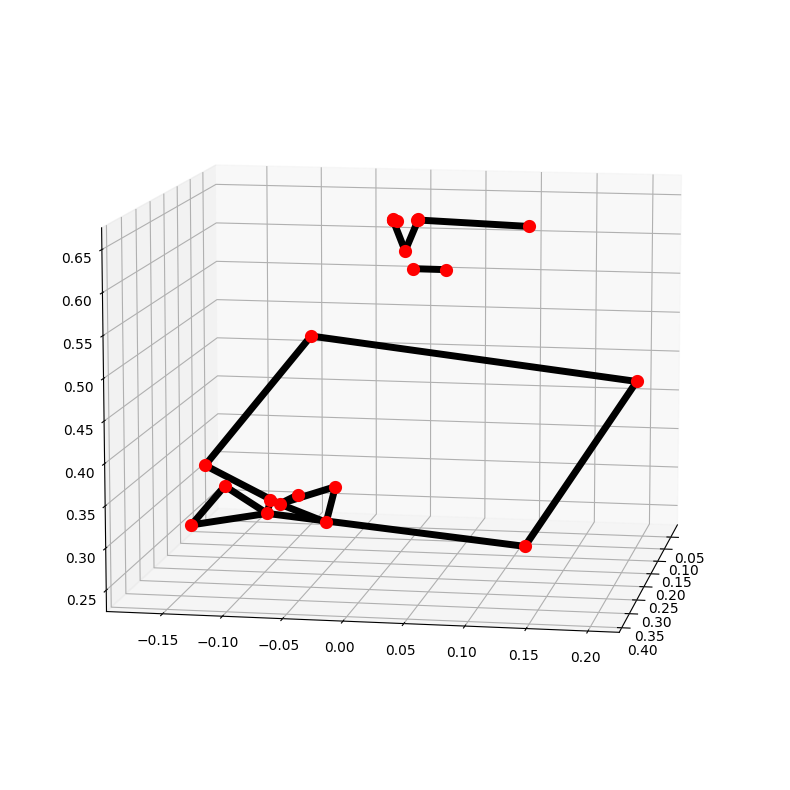

In [18]:
mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)

# TEST WITH VIDEO FILE

In [37]:
# import time
# start_time = time.time()

maximumPrediction = 0
bestPrediction = 0
threshold = 0.80
i = 0
# caption = cv2.VideoCapture('señaVideoCelular.mp4')
# caption = cv2.VideoCapture('paraDistanciasPuntos.avi')
# caption = cv2.VideoCapture('C:/Users/facur/Pictures/Camera Roll/señas1.mp4')
caption = cv2.VideoCapture('LSA64/all/047_005_001.mp4')
with mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as holisticModel:
    if (caption.isOpened() == False):
        print("Error opening video stream or file")
    keypointsSequence = []
    while(caption.isOpened()):
        _, _ = caption.read()
        ret, frame = caption.read()
#         print(caption.get(cv2.CAP_PROP_POS_FRAMES))
#         frame = cv2.flip(frame, 1) #en caso que las manos en la imagen no se encuentren de manera correcta (ver colores asignados en funcion draw_styled_landmarks())
        if (ret):
#             frame = cv2.resize(normalFrame, (640, 480))
            image, results = mediapipe_detection(frame, holisticModel)
            draw_styled_landmarks(image, results)
            keypoints = array_from_landmarks(results)
            keypointsSequence.append(keypoints)        
            cv2.imshow('Frame',image) 
        else:
            print("--- TERMINA ---")
            break
        if cv2.waitKey(25) & 0xFF == ord('q'):
            # Break the loop
            break
#             de aqui hacia abajo sacar 1 nivel de indentado
#         if len(keypointsSequence) < maximumNumberOfFrames:
#             a = paddData(keypointsSequence)

        prediction = model.predict(np.expand_dims(keypointsSequence, axis=0))
        if (np.max(prediction[0]) > threshold):
    #             keypointsSequence = [] #pruebo reiniciando la secuencia al predecir algo que supera el umbral
            print(signs_list[np.argmax(prediction)])
            i = i + 1
            if (maximumPrediction < np.max(prediction[0])):
                maximumPrediction = np.max(prediction[0])
                bestPrediction = prediction
#         else:
#             print('no prediccion')
#             i = i + 1

    
# When everything done, release the video capture object
caption.release()
# Closes all the frames
cv2.destroyAllWindows()

NameError: name 'array_from_landmarks' is not defined

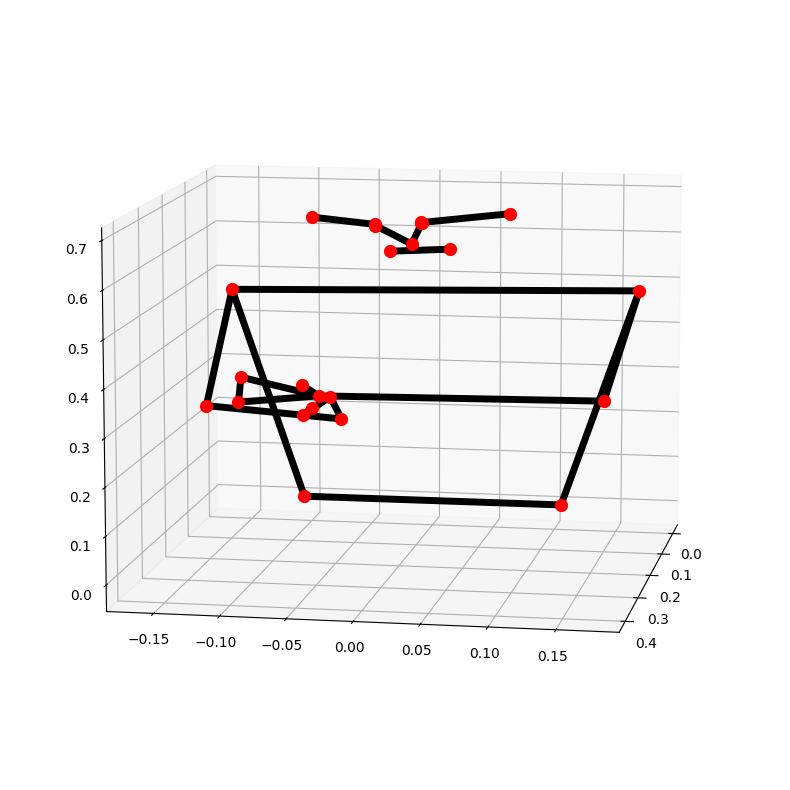

In [32]:
mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)

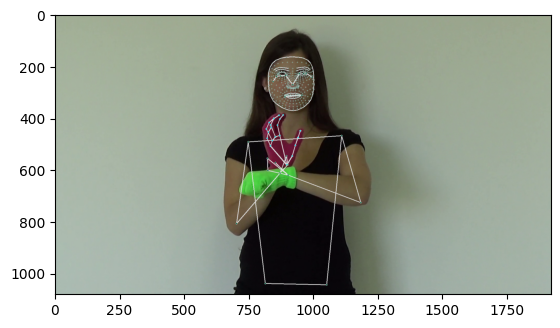

In [36]:
from matplotlib import pyplot as plt

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)

In [20]:
print(np.max(prediction))
print(signs_list[np.argmax(prediction)])

0.4442718
amarillo


In [77]:
print(maximumPrediction)
print(bestPrediction)
print(signs_list[np.argmax(bestPrediction[0])])
print(np.argmax(bestPrediction[0]))


0.89474064
[[1.0157805e-03 9.0408997e-05 5.2637898e-04 4.6044630e-03 3.4294854e-04
  7.0028558e-02 7.7413661e-06 5.0873350e-05 3.5120459e-06 8.9474064e-01
  3.1580616e-04 2.4100882e-03 7.1306499e-07 2.9438718e-03 3.6761706e-04
  1.0216679e-04 1.5990965e-05 6.0307939e-04 6.4709303e-03 1.3218754e-06
  5.0840586e-06 1.1349361e-02 1.2321677e-03 3.7611651e-06 5.1710129e-05
  5.1690827e-06 8.4687254e-06 2.2763447e-07 2.3045444e-05 1.6387806e-06
  1.8550260e-06 2.0278716e-05 1.3961575e-06 9.9427984e-07 1.1744218e-06
  1.1633574e-07 7.7629423e-09 1.5893326e-07 5.2747072e-07 1.9591738e-05
  1.6433938e-05 2.3990143e-04 7.7650904e-05 9.1350734e-07 4.5402544e-08
  1.3954674e-05 4.2182905e-06 2.4978786e-07 7.3595351e-05 1.1460894e-05
  1.0673028e-06 9.5684599e-04 4.5485804e-06 6.0510123e-04 3.7144455e-05
  1.8783544e-07 1.2487838e-05 1.0937163e-04 6.1463393e-06 1.8814391e-06
  3.4372424e-06 3.4996465e-05 3.8336447e-07 4.1833852e-04]]
enemigo
9


In [ ]:
TRIANGULOS
#             triangulo mano izquierda
#             pi1 = (int(keypoints[1018]*640),int(keypoints[1019]*480)) #dedo indice mano izq. 8
#             pi2 = (int(keypoints[958]*640),int(keypoints[959]*480)) #hombro izq 11
#             pi3 = (int(keypoints[1002]*640),int(keypoints[1003]*480)) #muñeca izq 0 
#             if (pi1 != (0,0) and pi3 != (0,0)):
#                 cv2.line(image, pi1, pi3, (255, 0, 0), 3)
#                 cv2.line(image, pi1, pi2, (255, 0, 0), 3)
#                 cv2.line(image, pi3, pi2, (255, 0, 0), 3)
#           distancias entre puntos (solo desde los 2 puntos de mano contra el hombro, no entre los 2 puntos de la mano)
#                 print("pi1 - pi2"+ str(math.sqrt(math.pow((pi1[0]/640)-(pi2[0]/640),2)+math.pow((pi1[1]/480)-(pi2[1]/480),2))))
#                 print("pi2 - pi3"+ str(math.sqrt(math.pow((pi3[0]/640)-(pi2[0]/640),2)+math.pow((pi3[1]/480)-(pi2[1]/480),2))))
                
#             triangulo mano derecha
#             pd1 = (int(keypoints[1060]*640),int(keypoints[1061]*480)) #dedo indice mano der. 8
#             pd2 = (int(keypoints[960]*640),int(keypoints[961]*480)) #hombro der. 12
#             pd3 = (int(keypoints[1044]*640),int(keypoints[1045]*480)) #muñeca der. 0
#             if (pd1 != (0,0) and pd3 != (0,0)):
#                 cv2.line(image, pd1, pd3, (200, 0, 0), 3)
#                 cv2.line(image, pd1, pd2, (200, 0, 0), 3)
#                 cv2.line(image, pd3, pd2, (200, 0, 0), 3)
#           distancias entre puntos (solo desde los 2 puntos de mano contra el hombro, no entre los 2 puntos de la mano)
#                 print("pd1 - pd2"+ str(math.sqrt(math.pow((pd1[0]/640)-(pd2[0]/640),2)+math.pow((pd1[1]/480)-(pd2[1]/480),2))))
#                 print("pd2 - pd3"+ str(math.sqrt(math.pow((pd3[0]/640)-(pd2[0]/640),2)+math.pow((pd3[1]/480)-(pd2[1]/480),2))))

In [21]:
#DISTANCIAS Euclideanas entre los puntos del triangulo
import math
print(pd1)
print(pd2)
print(math.sqrt(math.pow((pd1[0]/640)-(pd2[0]/640),2)+math.pow((pd1[1]/480)-(pd2[1]/480),2)))
print(math.sqrt(math.pow((pd1[0])-(pd2[0]),2)+math.pow((pd1[1])-(pd2[1]),2)))

(403, 237)
(236, 233)
0.2610705332868771
167.0478973228936


In [79]:
res = prediction[0]
if np.max(res) > 0.8:
    print('a')
else:
    print(np.max(res))

a


(1080, 1920, 3)
(1080, 1920, 3)


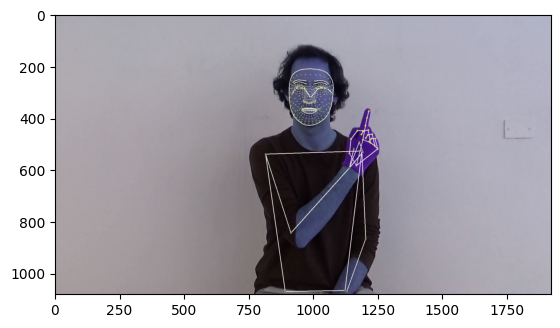

In [89]:
from matplotlib import pyplot as plt
image2 = image
# resizedImage = cv2.resize(image2, (640, 480))
resizedImage = cv2.resize(image2, (1920, 1080))
print(image2.shape)
print(resizedImage.shape)
plt.imshow(image2)
plt.imshow(resizedImage)

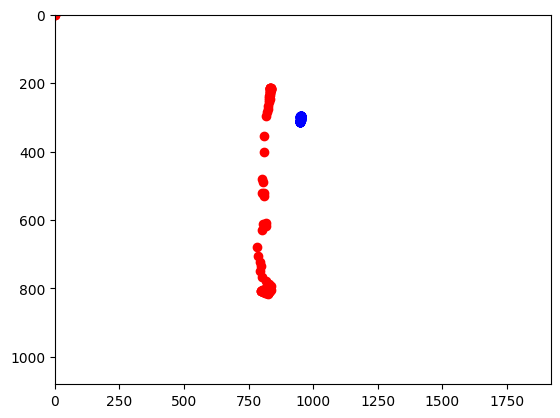

In [2]:
from matplotlib import pyplot as plt


result = np.load(os.path.join("LSA64_data/foto/00_00.npy"))
# resultWithoutFace = []
# for index in range(201):
#     resultWithoutFace.append(result[index][936:])
# resultWithoutFace

for index in range(0,201):
    x = result[index][1060]*1920
    y = result[index][1061]*1080
    plt.plot(x, y, 'ro')
    plt.plot(result[index][0]*1920, result[index][1]*1080, 'bo')
# el punto 124 y 125 son las X e Y del dedo indice para cada frame

plt.xlim([0,1920])
plt.ylim([0,1080])
plt.gca().invert_yaxis()
# importante invertir el eje de las Ordenadas (Y) ya que las imagenes tienen este ordenamiento, comenzando con el 0 arriba a la izquierda
plt.show()

# MOVENET TEST

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf

In [33]:
# LINK A MODELOS: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbkV2amdxdXRySHh6UkcyTDhJNlFTc0ItZ05MQXxBQ3Jtc0tuallJd2p4eXU0LTR2emVxNmNDMm9hYkw2Sno2WHRNNGZDRjg2TENqbFZNaTMzdWhQOUVQdHlBbmE5N0JMaGU1TS05MHdLUm1Dbzlyd2tieWc3VVNuU1BlYk41aG9QTmZYYzlIalBqM293dm5PWjVxZw&q=https%3A%2F%2Ftfhub.dev%2Fgoogle%2Flite-model%2Fmovenet%2Fsinglepose%2Flightning%2F3&v=SSW9LzOJSus
# interpreter = tf.lite.Interpreter("lite-model_movenet_singlepose_lightning_tflite_int8_4.tflite") #MUY LENTO, MUY LENTo
interpreter = tf.lite.Interpreter("lite-model_movenet_singlepose_lightning_tflite_float16_4.tflite") #NORMAL, COMO MEDIAPIPE tiempo 60 frames -> 7.819481372833252
# interpreter = tf.lite.Interpreter("lite-model_movenet_singlepose_lightning_3.tflite") #TIEMPO EN PROCESAR 60 frames tiempo real -> 7.843084096908569
interpreter.allocate_tensors()

In [53]:
import time
caption = cv2.VideoCapture(0)
caption.set(cv2.CAP_PROP_FPS, 60)

start_time = time.time()
frames = 0
while caption.isOpened() and frames < 60:
    frames = frames + 1
    ret, frame = caption.read()
    frameCopy = frame.copy()
    frameCopy = tf.image.resize_with_pad(np.expand_dims(frameCopy, axis=0), 192, 192)
    input_image = tf.cast(frameCopy, dtype=tf.uint8)

    input_details = interpreter.get_input_details() 
    output_details = interpreter.get_output_details()
    
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
#     print(keypoints_with_scores)
    draw_keypoints(frame, keypoints_with_scores, 0.5)
    draw_connections(frame, keypoints_with_scores, 0.5)
    cv2.imshow('POSE MOVENet..', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'): #press 'q' to break
        break
ending_time = time.time()
print(ending_time - start_time)
caption.release()
cv2.destroyAllWindows()

7.964142322540283


In [6]:
interpreter.get_input_details() 

[{'name': 'serving_default_input:0',
  'index': 0,
  'shape': array([  1, 192, 192,   3]),
  'shape_signature': array([  1, 192, 192,   3]),
  'dtype': numpy.uint8,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [24]:
interpreter.get_output_details() 

[{'name': 'StatefulPartitionedCall:0',
  'index': 332,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [23]:
interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

array([[[[0.49981618, 0.2949735 , 0.8029834 ],
         [0.4711382 , 0.32365146, 0.6350124 ],
         [0.48752564, 0.2581018 , 0.70056206],
         [0.49571934, 0.39739484, 0.6350124 ],
         [0.5243973 , 0.24581124, 0.8029834 ],
         [0.6145281 , 0.48752564, 0.24581124],
         [0.6800778 , 0.17206787, 0.84395194],
         [0.8521456 , 0.58175325, 0.75382113],
         [0.77020854, 0.02048427, 0.9422764 ],
         [0.58175325, 0.5243973 , 0.49981618],
         [0.6022375 , 0.06554966, 0.9422764 ],
         [0.9709544 , 0.38510427, 0.49981618],
         [0.9340827 , 0.18026158, 0.29907033],
         [0.897211  , 0.59404385, 0.07374337],
         [0.88901734, 0.02048427, 0.04096854],
         [0.01229056, 0.8808236 , 0.90540475],
         [0.6022375 , 0.0532591 , 0.36462   ]]]], dtype=float32)

In [47]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    heightY, widthX, _ = frame.shape
    results = np.squeeze(np.multiply(keypoints, [heightY, widthX, 1]))
    for coord in results:
        coordY, coordX, confidence = coord
        if (confidence > confidence_threshold):
            cv2.circle(frame, (int (coordX), int (coordY)), 2, (255,255,255), -1)

In [50]:
# sacado de la documentacion
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}
def draw_connections(frame, keypoints, confidence_threshold):
    heightY, widthX, _ = frame.shape
    results = np.squeeze(np.multiply(keypoints, [heightY, widthX, 1]))
    
    for node1, node2 in KEYPOINT_EDGE_INDS_TO_COLOR:
        coordYnode1, coordXnode1, confidenceNode1 = results[node1]
        coordYnode2, coordXnode2, confidenceNode2 = results[node2]
        if (confidenceNode1 > confidence_threshold and confidenceNode2 > confidence_threshold):
            cv2.line(frame, (int (coordXnode1), int (coordYnode1)), (int (coordXnode2), int (coordYnode2)), (255,0,0), 2)

12/12/2022

Probé los distintos modelos de MoveNet, pensé que iba a tener un aumento de velocidad sobre MediaPipe pero el tiempo tomado para ambas ejecuciones con 60 frames fue el mismo aproximadamente, 7segundos con MoveNet Lightning.
Llegué a MoveNet a traves de TensorFlow en [GitHub](https://github.com/tensorflow/tfjs-models/tree/master/pose-detection) donde proveen 3 modelos, cuando estaba buscando acerca de PoseNet.

No pruebo con OpenPose porque hay que compilar y hacer un build de la solucion para poder probarla.

# EXPORT MODEL WITH TENSORFLOWJS

In [13]:
# import tensorflowjs as tfjs
!pip3 install tensorflow_decision_forests --upgrade
# !tensorflowjs_converter --input_format=keras /modelos_pesos/GRUx3-GPUmia.h5 /exported_models/GRUx3-GPUmia

ERROR: Could not find a version that satisfies the requirement tensorflow_decision_forests (from versions: none)
ERROR: No matching distribution found for tensorflow_decision_forests


13/12/2022

Instalo TensorflowJS para exportar el modelo y poder usarlo con TensorflowJS en la web.

Con ```tensorflowjs_converter --input_format=keras /modelos_pesos/GRUx3-GPUmia.h5 /exported_models/GRUx3-GPUmia``` no lo pedo ejecutar debido a problemas con tensorflow_decision_forests.

Instalo ```pip install tensorflowjs[wizard]```

Desde la terminal ejecuto ```tensorflowjs_wizard``` y sigo los pasos que se van solicitando en la misma terminal. Es interactivo. Entrega un archivo models.json.

Exporté el mismo modelo 2 veces, uno como GRAPH y otro como LAYERS.
La diferencia de pesos es: 

Layers-> models.json=6KB
Graph-> models.json=160KB

# LIMPIEZA DE DATOS
Limpieza de datos: En mi caso voy a probar quitando los frames donde la cara no es visible (detectada) y/o donde no hay manos detectadas, es decir, me quedo con los frames que poseen CARA, como minimo 1 mano y tambien valores para las coordenadas de los 2 hombros.

In [107]:
sequences, labels = [],[]
for sign in range(len(signs_list)):
# for sign in range(2):
    for personNumber in range(numberOfPersons-1):
#     for personNumber in range(1):
        for videoNumber in range(numberOfVideosPerPerson):
#         for videoNumber in range(1):
            result = np.load(os.path.join(STORE_PATH2, signs_list[sign], f'''0{str(personNumber)}_0{str(videoNumber)}.npy'''))
            resultWithFace = []
#             for index in range(201):
            for index in range(0,201,2):#me salto de a 1 frame para probar con muestreo de cada video y no usar todos los frames, no es un muestreo probabilistico
#                 resultWithoutFace.append(result[index][936:])
                resultWithFace.append(result[index])
#             al haberme salteado de a 2 frames, de los 201 me quedan 67, entonces ahora limpio los frames "sucios" y paddeo con valor 3 hasta completar los 67
#             despues debería probar que en lugar de completar con valor de padding 3, usar el frame previo o siguiente al que se quitó.
#             Uso las coordenadas que saque cuando armé los triangulos
#             keypoints[1018] - keypoints[1019] #dedo indice mano izq. 8
#             keypoints[958] - keypoints[959] #hombro izq 11
#             keypoints[1002] - keypoints[1003] #muñeca izq 0 

#             keypoints[1060] - keypoints[1061] #dedo indice mano der. 8
#             keypoints[960] - keypoints[961] #hombro der. 12
#             keypoints[1044] - keypoints[1045] #muñeca der. 0
            cleanedResults = []
            for frame in range(len(resultWithFace)):
#                 En caso de frame "sucio" no debería reemplazarlo por dato de padding, por que el padding debería 
#                 ir solo al final, por lo que tomo un frame de izquierda o derecha.
# Sino no reemplazo con nada y hago el padding al final
                if (isFrameClean(resultWithFace[frame])):
                    cleanedResults.append(resultWithFace[frame])
            if (len(cleanedResults) != 101):
                cleanedResults = paddData(cleanedResults)
            sequences.append(cleanedResults)
            labels.append(sign_labels[signs_list[sign]])
sequences = np.array(sequences)
labels = to_categorical(labels).astype(int)

In [108]:
sequences.shape
# for i in range(sequences.shape[0]):
#     for j in range(sequences.shape[1]):
#         if (sequences[i][j][0] != 3):
#             print(j)

(2835, 101, 1086)

In [106]:
maximumNumberOfFrames = 101
def isFrameClean(frame):
    if ((frame[0] != 0.0 and frame[1] != 0.0 and frame[934] != 0.0 and frame[935] != 0.0) and 
        (frame[958] != 0.0 and frame[959] != 0.0 and frame[960] != 0.0 and frame[961] != 0.0) and 
        ((frame[1018] != 0.0 and frame[1019] != 0.0 and frame[1003] != 0.0 and frame[1004] != 0.0) or 
        (frame[1044] != 0.0 and frame[1045] != 0.0 and frame[1084] != 0.0 and frame[1085] != 0.0)) 
        ):
        return True
    return False    

Como hago para testear el modelo con los 67 frames y datos limpios si los videos son de mas cantidad de frames?
Pregunta mas que nada pensada para los videos, se arma una ventana para cada video?

Entrené 2 modelos con las salidas de correr 2 veces salteando de a 1 y de a 2 frames
El "mejor" modelo (solo probado con LSTM) fue el ultimo probado (saltenado de a 1 frames, 101 en total por video):
Acá los resultados de ejecutar el modelo sobre todos los videos, entregando al modelo cada video salteando de a 1 frame, es decir, sin limpiar resultados.
3150


2236


70.98412698412699%


2092


66.41269841269842%